In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
df=pd.read_csv("/content/drive/MyDrive/tam-sentiment-train.csv")
df = df.sample(frac = 1)
df.head()

,text,category
6947,Padathoda katha ok tha bt sariya yadukka theri...,Mixed_feelings
30661,un varthyila nambikkaye varamatekuthu en ya.semma,Positive
32527,Pongalukku paraak .....the 90`s Rajini Back......,Positive
31509,முதல் வாட்டி டிரெய்லர் ah பாத்து sirichichen.....,Positive
28776,24-07-2019 - 11:38 pm anybody here?,Mixed_feelings


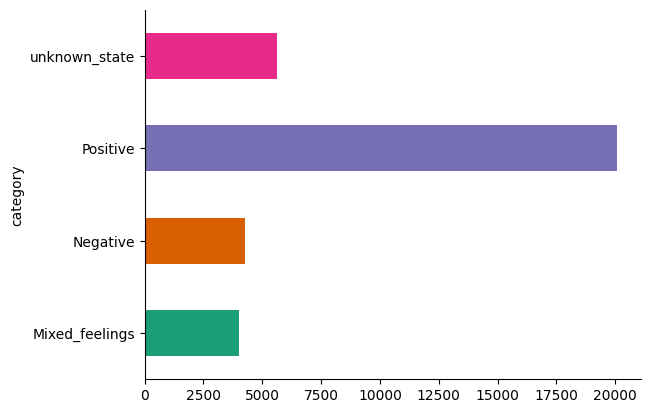

In [3]:
# @title category

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
vocab_size = len(tokenizer.word_index) + 1

In [5]:
sequences = tokenizer.texts_to_sequences(df['text'])
max_len = max([len(seq) for seq in sequences])
X = pad_sequences(sequences, maxlen=max_len, padding='post')

In [6]:
labels = pd.get_dummies(df['category'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


In [8]:
embedding_dim = 100
lstm_units = 128

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(4, activation='softmax'))

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(X_train, y_train, epochs=10, batch_size=1000, validation_data=(X_test, y_test))

Epoch 1/10
28/28 [==============================] - 46s 1s/step - loss: 1.1548 - accuracy: 0.5735 - val_loss: 1.0741 - val_accuracy: 0.5986
Epoch 2/10
28/28 [==============================] - 28s 1s/step - loss: 1.0073 - accuracy: 0.5977 - val_loss: 0.9723 - val_accuracy: 0.6192
Epoch 3/10
28/28 [==============================] - 28s 1s/step - loss: 0.8503 - accuracy: 0.6701 - val_loss: 0.9477 - val_accuracy: 0.6299
Epoch 4/10
28/28 [==============================] - 29s 1s/step - loss: 0.6741 - accuracy: 0.7432 - val_loss: 1.0206 - val_accuracy: 0.6227
Epoch 5/10
28/28 [==============================] - 28s 1s/step - loss: 0.5033 - accuracy: 0.8106 - val_loss: 1.0865 - val_accuracy: 0.6224
Epoch 6/10
28/28 [==============================] - 28s 993ms/step - loss: 0.3746 - accuracy: 0.8653 - val_loss: 1.2497 - val_accuracy: 0.6093
Epoch 7/10
28/28 [==============================] - 28s 976ms/step - loss: 0.2742 - accuracy: 0.9072 - val_loss: 1.3618 - val_accuracy: 0.6049
Epoch 8/10
28/

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

213/213 [==============================] - 17s 77ms/step - loss: 1.7347 - accuracy: 0.5806
Test Accuracy: 0.5806119441986084
